In [346]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib.legend_handler import HandlerLine2D
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from pyclustering.utils.metric import distance_metric, type_metric
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from sklearn.metrics import silhouette_score, davies_bouldin_score
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier

In [2]:
train_data = pd.read_csv('C:\\Users\\97254\\Desktop\\XY_train_final.csv')
#test_data = pd.read_csv('C:\\Users\\97254\\Desktop\\X_test_final.csv')
x = train_data.drop(['target'],axis=1)
y = train_data['target']

# Desicion Tree

In [104]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state = 123)

In [133]:
# Initial DT model #
DT_model = DecisionTreeClassifier(random_state = 123)
DT_model.fit(x_train,y_train)
print("roc_auc accuracy on the train set: ",round(roc_auc_score(y_train, DT_model.predict(x_train)),2))
print("roc_auc accuracy on the validation set: ",round(roc_auc_score(y_val, DT_model.predict(x_val)),2))

roc_auc accuracy on the train set:  1.0
roc_auc accuracy on the validation set:  0.62


In [189]:
# Grid_search hyperparameters tuning #
param_grid = {'max_depth': np.arange(1, 15, 1),
              'criterion': ['entropy', 'gini'],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'ccp_alpha': np.arange(0, 1, 0.05)
             }
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state = 123),
                           param_grid=param_grid,
                           refit=True,
                           cv=10)
grid_search.fit(x_train, y_train)
grid_Results = pd.DataFrame(grid_search.cv_results_)
print (grid_Results)
print('the best parameters combination is:' ,grid_search.best_params_)

      mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0          0.007480      0.004403         0.000722        0.000654   
1          0.005917      0.005011         0.001668        0.002839   
2          0.008754      0.002611         0.001194        0.000582   
3          0.009638      0.001211         0.001507        0.000511   
4          0.007415      0.000614         0.001312        0.000405   
...             ...           ...              ...             ...   
2235       0.042396      0.004550         0.000599        0.000662   
2236       0.014096      0.003103         0.001608        0.002863   
2237       0.014449      0.002444         0.000698        0.000457   
2238       0.014068      0.004850         0.000503        0.000503   
2239       0.044144      0.003455         0.000802        0.000401   

     param_ccp_alpha param_criterion param_max_depth param_max_features  \
0                0.0         entropy               1               auto   
1        

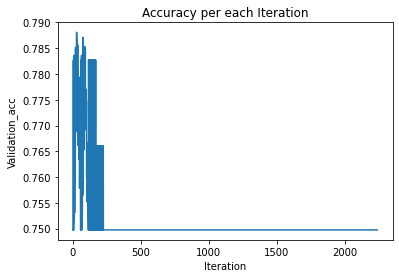

In [191]:
y_res = grid_Results['mean_test_score']
plt.plot(y_res)
plt.xlabel('Iteration')
plt.ylabel('Validation_acc')
plt.title('Accuracy per each Iteration')
plt.show()

In [192]:
# max_depth influence on model # 
max_depth_list = np.arange(1,50,1)
res = pd.DataFrame()
for max_depth in max_depth_list:
    DT_model = DecisionTreeClassifier(criterion = 'entropy',max_depth = max_depth,random_state = 123)
    DT_model.fit(x_train,y_train)
    res = res.append({'max_depth':max_depth,
                     'train_acc':roc_auc_score(y_train, DT_model.predict(x_train)),
                     'val_acc':roc_auc_score(y_val, DT_model.predict(x_val))}, ignore_index = True)

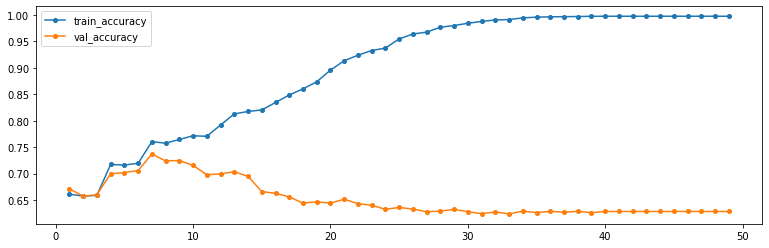

In [193]:
plt.figure(figsize=(13,4))
plt.plot(res['max_depth'], res['train_acc'], marker='o', markersize = 4)
plt.plot(res['max_depth'], res['val_acc'], marker='o', markersize = 4)
plt.legend(['train_accuracy','val_accuracy'])
plt.show()

In [165]:
res.sort_values('val_acc', ascending = False)

,max_depth,train_acc,val_acc
6,7.0,0.760333,0.736909
8,9.0,0.764530,0.724705
7,8.0,0.757572,0.724023
9,10.0,0.771542,0.715491
5,6.0,0.719500,0.705788
12,13.0,0.812891,0.703451
4,5.0,0.716183,0.701869
3,4.0,0.717255,0.699650
11,12.0,0.791868,0.699401
10,11.0,0.770520,0.697765


In [194]:
# max features influence on model #
max_features = np.arange(1, x_train.shape[1], 1)
train_results = []
test_results = []
for max_feature in max_features:
    dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 7,max_features = max_feature, random_state = 123)
    dt_model.fit(x_train, y_train)
    
    train_pred = dt_model.predict(x_train)
    FPR, TPR, thresholds = roc_curve(y_train, train_pred)
    auc_score = auc(FPR, TPR)
    train_results.append(auc_score)
    
    val_pred = dt_model.predict(x_val)
    FPR, TPR, thresholds = roc_curve(y_val, val_pred)
    auc_score = auc(FPR, TPR)
    test_results.append(auc_score)

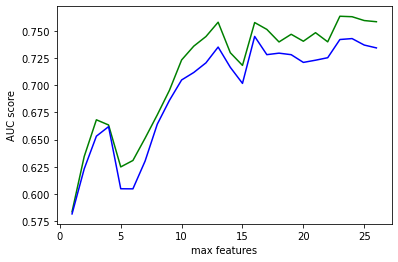

In [195]:
line1 = plt.plot(max_features, train_results, 'g', label='Train AUC')
line2 = plt.plot(max_features, test_results, 'b', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

In [198]:
# Best model #
from sklearn.model_selection import cross_val_score
best_DT = grid_search.best_estimator_
best_DT.fit(x_train, y_train)
scores = cross_val_score(best_DT, x_train, y_train, cv = 10, scoring = 'roc_auc')
print("Train accuracy:", round(best_DT.score(x_train, y_train), 2))
print("Validation accuracy: %0.2f" % (scores.mean()))
y_predict = best_DT.predict(x_val)
print("Test Accuracy:  %0.2f" % roc_auc_score(y_val, y_predict))

Train accuracy: 0.81
Validation accuracy: 0.78
Test Accuracy:  0.74


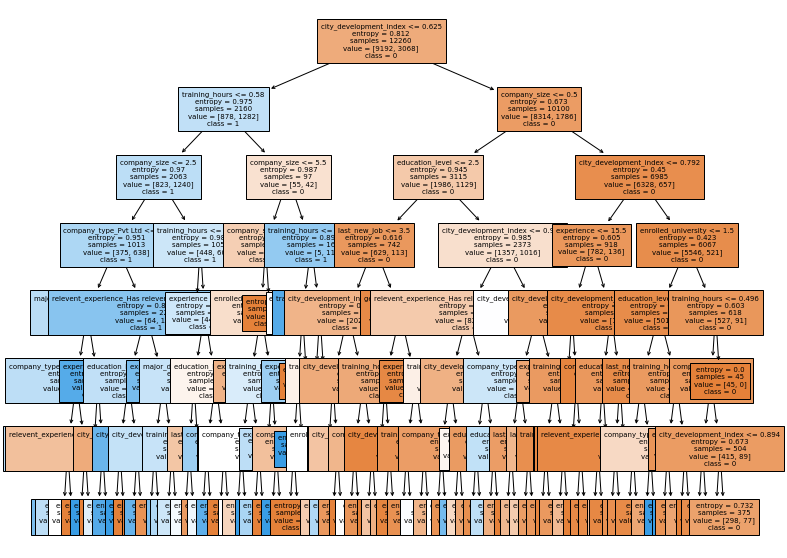

In [340]:
plt.figure(figsize=(12,10))
plot_tree(best_DT, filled = True, class_names = ['0','1'], feature_names = x.columns, fontsize=7)
plt.show()

In [150]:
#importance = best_DT.feature_importances_
important_features_dict = {}
for name, importance in zip(x.columns, best_DT.feature_importances_):
    important_features_dict[name] = importance
Rounded_dict = {k: round(v, 3) for k, v in important_features_dict.items()}
{k: v for k, v in sorted(Rounded_dict.items(), reverse=True, key=lambda item: item[1])}

{'city_development_index': 0.495,
 'company_size': 0.287,
 'education_level': 0.071,
 'experience': 0.033,
 'training_hours': 0.031,
 'last_new_job': 0.029,
 'relevent_experience_Has relevent experience': 0.017,
 'enrolled_university': 0.01,
 'company_type_Pvt Ltd': 0.01,
 'relevent_experience_No relevent experience': 0.003,
 'gender_Male': 0.003,
 'company_type_Unknown': 0.003,
 'major_discipline_Other': 0.002,
 'company_type_Public Sector': 0.002,
 'gender_Female': 0.001,
 'company_type_Funded Startup': 0.001,
 'Central_city': 0.0,
 'Experience_index': 0.0,
 'gender_Other': 0.0,
 'major_discipline_Arts': 0.0,
 'major_discipline_Business Degree': 0.0,
 'major_discipline_Humanities': 0.0,
 'major_discipline_No Major': 0.0,
 'major_discipline_STEM': 0.0,
 'company_type_Early Stage Startup': 0.0,
 'company_type_NGO': 0.0,
 'company_type_Other': 0.0}

<AxesSubplot:title={'center':'Feature Importance'}>

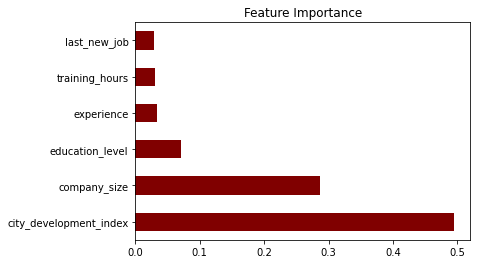

In [25]:
feat_importances = pd.Series(best_DT.feature_importances_, index = x.columns)
feat_importances.nlargest(6).plot(kind='barh',title = "Feature Importance", color = ['maroon'])

In [122]:
# Artificial Neural Networks

In [51]:
#Scaling the data
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_val = scaler.fit_transform(x_val)

(3066, 27)

In [138]:
#Initial ANN model 
initAnn = MLPClassifier(random_state = 123)
initAnn.fit(scaled_x_train, y_train)
print("Train accuracy: ", round(roc_auc_score(y_train, initAnn.predict(scaled_x_train)), 2))
print("Validation Accuracy:", round(roc_auc_score(y_val, initAnn.predict(scaled_x_val)), 2))

Train accuracy:  0.73
Validation Accuracy: 0.66


C:\Users\97254\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [201]:
#Hyperparameters tuning
hidden_layer_size = [(28,), (28, 28), (28, 28, 28)]
activation = ['tanh', 'relu']
solver = ['sgd']
learning_rate = [0.001,0.005,0.01]
list = []
train_accs = []
val_accs = []
for solver_index in solver:
    for activation_index in activation:
        for learning_rate_index in learning_rate:
              for hidden_size_index in hidden_layer_size:
                    NN_Hyperparameters = MLPClassifier(hidden_layer_sizes=hidden_size_index, activation=activation_index,
                                                     solver=solver_index,  learning_rate_init=learning_rate_index,
                                                       early_stopping = True, max_iter = 600).fit(scaled_x_train, y_train)
                    scores = cross_val_score(NN_Hyperparameters, scaled_x_train, y_train, scoring = 'roc_auc', cv = 10)
                    y_predict = NN_Hyperparameters.predict(scaled_x_val)
                    list.append([str(hidden_size_index), str(activation_index), str(solver_index),
                                learning_rate_index, NN_Hyperparameters.score(scaled_x_train, y_train),
                                 scores.mean(), roc_auc_score(y_val,y_predict)])
                    train_acc= round(roc_auc_score(y_train,NN_Hyperparameters.predict(scaled_x_train)),2)
                    train_accs.append(train_acc)
                    val_acc = round(roc_auc_score(y_val,y_predict), 2)
                    val_accs.append(val_acc)
results = pd.DataFrame(list, columns=['hidden_layers', 'activation', 'solver', 'learning_rate', 'Train acc', 'Val acc','Test acc'])
results = results.sort_values(by='Val acc', ascending=False)
print(results)
rows = len(results)
print("the number of iterations is: " + str(rows))

   hidden_layers activation solver  learning_rate  Train acc   Val acc  \
16      (28, 28)       relu    sgd          0.010   0.794209  0.789981   
17  (28, 28, 28)       relu    sgd          0.010   0.793801  0.787900   
7       (28, 28)       tanh    sgd          0.010   0.792577  0.787146   
3          (28,)       tanh    sgd          0.005   0.780750  0.784787   
15         (28,)       relu    sgd          0.010   0.776754  0.784397   
14  (28, 28, 28)       relu    sgd          0.005   0.790375  0.783702   
8   (28, 28, 28)       tanh    sgd          0.010   0.789478  0.783529   
4       (28, 28)       tanh    sgd          0.005   0.789967  0.783430   
13      (28, 28)       relu    sgd          0.005   0.793067  0.782496   
12         (28,)       relu    sgd          0.005   0.779119  0.780841   
6          (28,)       tanh    sgd          0.010   0.788907  0.779897   
2   (28, 28, 28)       tanh    sgd          0.001   0.776754  0.779645   
5   (28, 28, 28)       tanh    sgd    

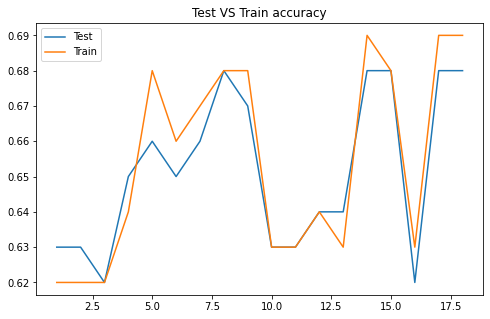

In [203]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 19, 1), val_accs, label='Test')
plt.plot(range(1, 19, 1), train_accs, label='Train')
plt.legend()
plt.title('Test VS Train accuracy')
plt.show()

In [200]:
train_val_df = pd.DataFrame({
    'Train acc': train_accs,
    'Val acc': val_accs
})
train_val_df.sort_values('Val acc', ascending = False)

,Train acc,Val acc
7,0.69,0.69
8,0.68,0.68
15,0.69,0.68
16,0.69,0.67
24,0.66,0.66
17,0.67,0.66
12,0.65,0.65
3,0.65,0.65
6,0.66,0.65
13,0.65,0.64


In [204]:
print(results.loc[[13]])

   hidden_layers activation solver  learning_rate  Train acc   Val acc  \
13      (28, 28)       relu    sgd          0.005   0.793067  0.782496   

    Test acc  
13  0.682605  


In [215]:
NN = MLPClassifier(hidden_layer_sizes=(28,28), activation='relu', solver='sgd', learning_rate_init=0.005,
                                                       early_stopping = True, max_iter = 600, random_state = 123).fit(scaled_x_train, y_train)
Best_NN_Score = cross_val_score(NN, scaled_x_train, y_train, scoring = 'roc_auc', cv = 10)
NN_train_score = round(NN.score(scaled_x_train, y_train),2)
NN_val_score = round(Best_NN_Score.mean(),2)
NN_Test_score = round(roc_auc_score(y_val,NN_Hyperparameters.predict(scaled_x_val)), 2)
print("Train score: ", NN_train_score)
print("Validation score: ", NN_val_score)
print("Test score: ", NN_Test_score)

Train score:  0.79
Validation score:  0.78
Test score:  0.68


In [231]:
# confusion matrix
conf_matrix = confusion_matrix(y_val,NN_Hyperparameters.predict(scaled_x_val))
accuracy_table = pd.DataFrame(conf_matrix, index=['0','1'],columns=['predicted_0','predicted_1'])
accuracy_table['Type_Accuracy'] = (round(accuracy_table.iloc[0,0] / sum(accuracy_table.iloc[0]),2),
                                   round(accuracy_table.iloc[1,1] / sum(accuracy_table.iloc[1]),2))
NN_TPR = round(accuracy_table.iloc[1,1] / sum(accuracy_table.iloc[1]),2)
NN_FNR = round(1 - NN_TPR,2)
NN_TNR = round(accuracy_table.iloc[0,0] / sum(accuracy_table.iloc[0]),2)
NN_FPR = round(1 - NN_TNR,2)
Rates_dict = {
    'True positive rate': NN_TPR,
    'False negative rate': NN_FNR,
    'True negative rate': NN_TNR,
    'False positive rate': NN_FPR
}
print(Rates_dict)
accuracy_table

{'True positive rate': 0.47, 'False negative rate': 0.53, 'True negative rate': 0.89, 'False positive rate': 0.11}


,predicted_0,predicted_1,Type_Accuracy
0,2052,257,0.89
1,402,355,0.47


In [332]:
#SVM model
SVM_model = LinearSVC(random_state = 123)
SVM_model.fit(x_train, y_train) 
print("roc auc accuracy on the train set: ", round(roc_auc_score(y_train, SVM_model.predict(x_train)),2))
print("roc auc accuracy on the validation set: ", round(roc_auc_score(y_val, SVM_model.predict(x_val)),2))
#SVM_model.coef_.shape

roc auc accuracy on the train set:  0.6
roc auc accuracy on the validation set:  0.61


C:\Users\97254\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [326]:
# Hyper-parameters tuning
max_c_list = [0.0001,0.001,0.01,0.1,1,10,100,200,300]
SVM_res = pd.DataFrame()
for max_c in max_c_list:
    SVM_model = LinearSVC(C = max_c , max_iter = 10000, random_state = 123)
    SVM_model.fit(x_train,y_train)
    SVM_res = SVM_res.append({'C':max_c,
                     'train_acc':roc_auc_score(y_train, SVM_model.predict(x_train)),
                     'val_acc':roc_auc_score(y_val, SVM_model.predict(x_val))}, ignore_index = True)

C:\Users\97254\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\97254\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\97254\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\97254\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\97254\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

In [327]:
SVM_res_sorted = SVM_res.sort_values(["train_acc", "val_acc"], ascending=False)
SVM_res_sorted

,C,train_acc,val_acc
5,10.0000,0.707241,0.701589
6,100.0000,0.618546,0.636272
4,1.0000,0.609965,0.622087
3,0.1000,0.603666,0.612125
2,0.0100,0.576027,0.582034
1,0.0010,0.543989,0.544244
7,200.0000,0.529248,0.527467
8,300.0000,0.517540,0.523432
0,0.0001,0.502607,0.502869


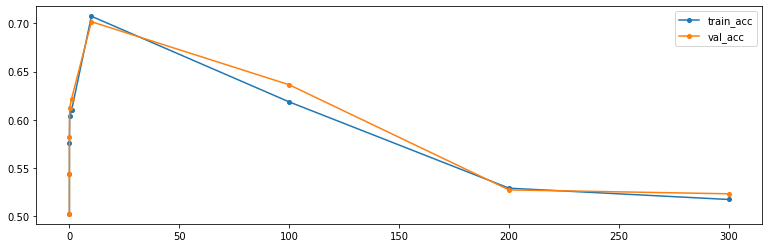

In [330]:
plt.figure(figsize=(13,4))
plt.plot(SVM_res['C'], SVM_res['train_acc'], marker='o', markersize = 4)
plt.plot(SVM_res['C'], SVM_res['val_acc'], marker='o', markersize = 4)
plt.legend(['train_acc','val_acc'])
plt.show()

In [336]:
coefficients = pd.concat([pd.DataFrame(np.transpose(SVM_model.coef_)),pd.DataFrame(x_train.columns)], axis = 1)
Feature_coefficients = coefficients.set_axis(['Coefficient','Feature'], axis=1, inplace=False)
Feature_coefficients

,Coefficient,Feature
0,-2.269804,city_development_index
1,0.056583,enrolled_university
2,-0.020531,education_level
3,-0.007920,experience
4,-0.022870,company_size
5,-0.012373,last_new_job
6,-0.094569,training_hours
7,0.255715,Central_city
8,0.031529,Experience_index
9,0.301410,relevent_experience_Has relevent experience


In [ ]:
# K-medoids
train_data_cluster = pd.read_csv(r'C:\Users\astar\Desktop\XY_train_fiture_extraction.csv')
#test_data_cluster = pd.read_csv(r'C:\Users\astar\Desktop\XY_train_fiture_extraction.csv')
x_cluster = train_data.drop(['target'],axis=1)
y_cluster = train_data['target']
x_cluster.to_numpy
x_cluster = pd.get_dummies(x)
x_cluster = scaler.fit_transform(x)

In [ ]:
metric = distance_metric(type_metric.GOWER, max_range = x_cluster.max(axis=0))
dbi_list = []
sil_list = []
max_n_clusters = 8
for n_clusters in tqdm(range(2, max_n_clusters, 1)):
    initial_medoids = kmeans_plusplus_initializer(x_cluster, n_clusters).initialize(return_index=True)
    kmedoids_instance = kmedoids(x_cluster, initial_medoids, metric=metric)
    kmedoids_instance.process()
    assignment = kmedoids_instance.predict(x_cluster)

    sil = silhouette_score(x_cluster, assignment)
    dbi = davies_bouldin_score(x_cluster, assignment)

    dbi_list.append(dbi)
    sil_list.append(sil)

In [ ]:
plt.plot(range(2, max_n_clusters, 1), sil_list, marker='o')
plt.title("Silhouette")
plt.xlabel("Number of clusters")
plt.show()

plt.plot(range(2, max_n_clusters, 1), dbi_list, marker='o')
plt.title("Davies-bouldin")
plt.xlabel("Number of clusters")
plt.show()

In [365]:
#Final model classify file
dt_Bestmodel = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, random_state = 123)
test_data = pd.read_csv('C:\\Users\\97254\\Desktop\\X_test_final.csv')
RF_x_train, RF_x_test, RF_y_train, RF_y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

ss = StandardScaler()
ss.fit(RF_x_train)
xtrain = ss.transform(RF_x_train)
xtest = ss.transform(RF_x_test)

dt_Bestmodel.fit(RF_x_train, RF_y_train)
DT_Best_Score = cross_val_score(dt_Bestmodel, RF_x_train, RF_y_train, scoring = 'roc_auc', cv = 10)
DT_train_score = round(dt_Bestmodel.score(RF_x_train, RF_y_train),2)
DT_val_score = round(Best_Score.mean(),2)
print("Train score: ", DT_train_score)
print("Validation score: ", DT_val_score)

DT_targets = dt_Bestmodel.predict(test_data)
print(DT_targets)
DT_prediction = pd.DataFrame(targets, columns=['targets']).to_csv('DT.csv')

RF_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 9, max_samples = 0.6, random_state = 123).fit(RF_x_train,RF_y_train)
Best_Score = cross_val_score(RF_clf, RF_x_train, RF_y_train, scoring = 'roc_auc', cv = 10)
RF_train_score = round(RF_clf.score(RF_x_train, RF_y_train),2)
RF_val_score = round(Best_Score.mean(),2)
print("Train score: ", RF_train_score)
print("Validation score: ", RF_val_score)

targets = RF_clf.predict(test_data)
print(targets)
prediction = pd.DataFrame(targets, columns=['targets']).to_csv('G10_ytest.csv')

Train score:  0.81
Validation score:  0.8
[0 0 0 ... 1 1 0]
Train score:  0.82
Validation score:  0.8
[0 0 0 ... 1 1 0]
